In [25]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [28]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df= pd.read_csv(url)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [30]:
df.sort_values(by="Date",inplace=True)

In [31]:
df.sort_values(by="Date",inplace=True)
df.reset_index(inplace=True)
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


Text(0.5, 1.0, 'Stack Indexed View')

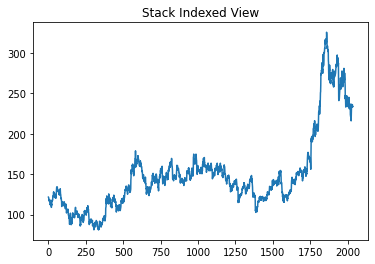

In [32]:
df1=df['Close']
plt.plot(df1) 
plt.title("Stack Indexed View")

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.16584967]
 [0.16319444]
 [0.1621732 ]
 ...
 [0.62622549]
 [0.62214052]
 [0.62418301]]


In [34]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [36]:
training_size


1424

In [37]:
test_size

611

In [38]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [39]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(1323, 100)
(1323,)
(510, 100)
(510,)


(None, None)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 11s 255ms/step - loss: 0.0114 - val_loss: 0.0011
Epoch 2/60
19/19 [==============================] - 4s 184ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 3/60
19/19 [==============================] - 3s 179ms/step - loss: 8.7402e-04 - val_loss: 0.0011
Epoch 4/60
19/19 [==============================] - 4s 185ms/step - loss: 7.9767e-04 - val_loss: 0.0010
Epoch 5/60
19/19 [==============================] - 3s 180ms/step - loss: 7.3690e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 3s 184ms/step - loss: 7.4877e-04 - val_loss: 9.3814e-04
Epoch 7/60
19/19 [==============================] - 3s 184ms/step - loss: 7.1015e-04 - val_loss: 8.9835e-04
Epoch 8/60
19/19 [==============================] - 3s 181ms/step - loss: 7.1463e-04 - val_loss: 8.7857e-04
Epoch 9/60
19/19 [==============================] - 3s 181ms/step - loss: 6.7545e-04 - val_loss: 9.2046e-04
Epoch 10/60
19/19 [==============================] - 3s

In [42]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 4s 189ms/step - loss: 2.6837e-04 - val_loss: 2.1030e-04
Epoch 2/60
19/19 [==============================] - 4s 186ms/step - loss: 2.3926e-04 - val_loss: 2.5066e-04
Epoch 3/60
19/19 [==============================] - 3s 183ms/step - loss: 2.3354e-04 - val_loss: 1.9561e-04
Epoch 4/60
19/19 [==============================] - 4s 184ms/step - loss: 2.2061e-04 - val_loss: 1.9231e-04
Epoch 5/60
19/19 [==============================] - 3s 184ms/step - loss: 2.2552e-04 - val_loss: 1.8572e-04
Epoch 6/60
19/19 [==============================] - 3s 184ms/step - loss: 2.2303e-04 - val_loss: 1.8556e-04
Epoch 7/60
19/19 [==============================] - 3s 182ms/step - loss: 2.0639e-04 - val_loss: 1.8294e-04
Epoch 8/60
19/19 [==============================] - 3s 184ms/step - loss: 2.2337e-04 - val_loss: 2.7448e-04
Epoch 9/60
19/19 [==============================] - 3s 184ms/step - loss: 2.5813e-04 - val_loss: 1.8910e-04
Epoch 10/60
19/19 [=========